# A Prescriptive Model for Strategic Decision-making: An Inventory Model

### ALY6050_Module 4 Project


.
### Shamim Sherafati
### Instructor: Soheil Parsa

NUID: 002742363     |    Date: March 23, 2023

## Part 1:
### Question 1: 
Define the data, uncontrollable inputs, model parameters, and the decision variables that influence the total inventory cost.

In [8]:
# calculations:

#Annual demand = (D)
#Ordering cost = (S)

#Carrying/Holding cost per unit = (H)
D = 15000
S =220
H =14.4

#order quantity = EQQ
import math
EQQ = math.sqrt((2*D*S)/H)   #a=EQQ
print (EQQ)

Q = EQQ/2
print (Q)

#annual ordering cost
print ((D/EQQ)*14.40)

#Annual holding cost:
#average inventory level: Q/2 + L

print ((EQQ/2) + (2*EQQ/52))

677.00320038633
338.501600193165
319.05314461843045
364.5401848234085


In [17]:
# Create table for Q1

import pandas as pd

# create data as a list of dictionaries
Table1 = pd.DataFrame({'Data': [" Annual demand (D)",      
"Cost per unit",      
"Ordering cost (S)",        
"Holding cost",       
"Carrying/Holding cost per unit (H)",   
"Total Annual Cost ",
"EOQ (order quantity)",
"Q* (optimal cutoff point to order units)"]  , 
'Value' : [15000,
80,
220 ,
18,
14.40,
364.540185,
677.003200,
338.501600] , 
'Type':["Uncontrollable",
"Parameter",
"Parameter" ,
"Parameter",
"Parameter",
"Decision Variable",
"Decision Variable",
"Decision Variable"]})

Table1


,Data,Value,Type
0,Annual demand (D),15000.000000,Uncontrollable
1,Cost per unit,80.000000,Parameter
2,Ordering cost (S),220.000000,Parameter
3,Holding cost,18.000000,Parameter
4,Carrying/Holding cost per unit (H),14.400000,Parameter
5,Total Annual Cost,364.540185,Decision Variable
6,EOQ (order quantity),677.003200,Decision Variable
7,Q* (optimal cutoff point to order units),338.501600,Decision Variable


### Question 2: 
Develop mathematical functions that compute the annual ordering cost and annual holding cost based on average inventory held throughout the year and use them to develop a mathematical model for the total inventory cost.

In [18]:
# Create table for Q2

# create data as a list of dictionaries
Table2 = pd.DataFrame({'Annual Ordering Cost': [4874.423046]  , 
'Annual holding cost' : [4874.42304] , 
                       
'Total Inventory Cost':[9748]})

Table2

,Annual Ordering Cost,Annual holding cost,Total Inventory Cost
0,4874.423046,4874.42304,9748


### Question 4:
Use data tables to find an approximate order quantity that results in the smallest total cost.

In [80]:
import pandas as pd
import numpy as np

# Define a function to calculate the total cost
def total_cost(order_quantity):
    unit_cost = 80
    annual_demand = 15000
    ordering_cost = 220
    holding_cost = 18/100 * unit_cost
    annual_ordering_cost = round((annual_demand / order_quantity) * ordering_cost, 2)
    annual_holding_cost = round((order_quantity / 2) * holding_cost, 2)
    total_cost = annual_ordering_cost + annual_holding_cost
    return total_cost

# Run the code and store the output in a list
output_list = []
for i in range(800, 821):
    order_quantity = i
    total_cost_value = total_cost(order_quantity)
    output_list.append([order_quantity, total_cost_value])

# Create a DataFrame from the output list
Table3 = pd.DataFrame(output_list, columns=["Order Quantity", "Total Cost"])
Table3


,Order Quantity,Total Cost
0,800,9885.00
1,801,9887.05
2,802,9889.11
3,803,9891.19
4,804,9893.28
5,805,9895.38
6,806,9897.49
7,807,9899.62
8,808,9901.76
9,809,9903.91


### Question 5:
Plot the Total Cost versus the Order Quantity

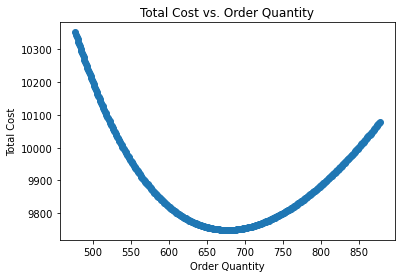

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to calculate the total cost
def total_cost(order_quantity):
    annual_ordering_cost = round((15000 / order_quantity) * 220, 2)
    annual_holding_cost = round((order_quantity / 2) * 14.4, 2)
    total_cost = annual_ordering_cost + annual_holding_cost
    return total_cost

# Find the order quantity that results in the smallest total cost
min_total_cost = float('inf')
best_order_quantity = None
for order_quantity in range(1, 15001):
    cost = total_cost(order_quantity)
    if cost < min_total_cost:
        min_total_cost = cost
        best_order_quantity = order_quantity

# Set the range of order quantities for the plot
order_quantities = range(best_order_quantity - 200, best_order_quantity + 201)

# Create a DataFrame with the order quantities and total costs
total_costs = [total_cost(x) for x in order_quantities]
data = {'Order Quantity': order_quantities, 'Total Cost': total_costs}
Table3 = pd.DataFrame(data)

# Create a plot of total cost vs. order quantity
plt.plot(Table3['Order Quantity'], Table3['Total Cost'], marker='o')
plt.xlabel('Order Quantity')
plt.ylabel('Total Cost')
plt.title('Total Cost vs. Order Quantity')
plt.show()


## Part 2
Assume that all problem parameters have the same values as those in part I, but that the annual demand
has a triangular probability distribution between 13000 and 17000 units with a mode of 15000 units.

1. Perform a simulation consisting of 1000 occurrences and calculate the minimum total cost for each occurrence. Next, use the results of your simulation to:

### (i)
Estimate the expected minimum total cost by constructing a 95% confidence interval for
it and determine the probability distribution that best fits its distribution. Verify the
validity of your choice.

In [105]:
# get the SD of minimum cost and Sample mean by constructing a 95% confidence interval.
import numpy as np

# Define a function to compute the optimal order quantity
def compute_optimal_order_quantity(demand, holding_cost, ordering_cost):
    EOQ = np.sqrt((2 * demand * ordering_cost) / holding_cost)
    return EOQ

# Define a function to compute the total cost
def compute_total_cost(demand, order_quantity, holding_cost, ordering_cost):
    setup_cost = (demand / order_quantity) * ordering_cost
    holding_cost = (order_quantity / 2) * holding_cost
    total_cost = setup_cost + holding_cost
    return total_cost

# Define the problem parameters
demand_mode = 15000
demand_min = 13000
demand_max = 17000
holding_cost = 0.144 * 80
ordering_cost = 220

# Perform the simulation
min_costs = np.zeros(1000)
for i in range(1000):
    demand = np.random.triangular(demand_min, demand_mode, demand_max)
    order_quantity = compute_optimal_order_quantity(demand, holding_cost, ordering_cost)
    min_cost = compute_total_cost(demand, order_quantity, holding_cost, ordering_cost)
    min_costs[i] = min_cost

# Calculate the expected minimum total cost and the 95% confidence interval
mean_min_cost = np.mean(min_costs)
std_min_cost = np.std(min_costs, ddof=1)
n = len(min_costs)
z_critical = 1.96  # for 95% confidence interval
margin_of_error = z_critical * std_min_cost / np.sqrt(n)
lower_bound = mean_min_cost - margin_of_error
upper_bound = mean_min_cost + margin_of_error

# Print the results
print(f"Expected minimum total cost: {mean_min_cost:.2f}")
print(f"95% confidence interval: ({lower_bound:.2f}, {upper_bound:.2f})")



# Assuming 'min_costs' is the array of minimum cost values obtained from the simulation
sample_std = np.std(min_costs, ddof=1)

print("Sample Standard Deviation: ", sample_std)


Expected minimum total cost: 8711.59
95% confidence interval: (8696.88, 8726.30)
Sample Standard Deviation:  237.31957274692581


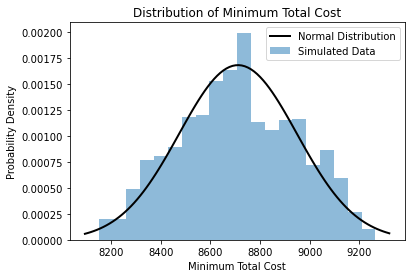

In [110]:
# to determine the probability distribution that best fits the distribution of minimum cost values, 
# we can use the histogram and probability density function (PDF) plot

import matplotlib.pyplot as plt
from scipy.stats import norm

# Histogram
plt.hist(min_costs, bins=20, density=True, alpha=0.5)

# PDF plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_min_cost, std_min_cost)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('Minimum Total Cost')
plt.ylabel('Probability Density')
plt.title('Distribution of Minimum Total Cost')
plt.legend(['Normal Distribution', 'Simulated Data'])
plt.show()




In [124]:
# The Shapiro-Wilk test:

# (H0) is that the minimum cost values obtained from the simulation follow a normal distribution.
# (H1) is that the minimum cost values obtained from the simulation do not follow a normal distribution.

import numpy as np
from scipy.stats import kstest, norm

# Load the minimum cost values obtained from the simulation
minimum_costs = np.array(min_costs)

# Fit a normal distribution to the minimum cost values
mu, std = norm.fit(minimum_costs)

# Perform the Kolmogorov-Smirnov test
ks_stat, p_value = kstest(minimum_costs, 'norm', args=(mu, std))

# Set the significance level
alpha = 0.05

# Calculate the chi-squared value and degrees of freedom
n = len(minimum_costs)
expected_cdf = norm.cdf(minimum_costs, mu, std)
observed_cdf = np.arange(1, n+1) / n
chi_sq = np.sum((observed_cdf - expected_cdf)**2 / expected_cdf)
df = n - 3  # degrees of freedom: k - 1 - p, where k = number of bins = 1, p = number of parameters estimated = 2

# Check if the null hypothesis is rejected
if p_value < alpha:
    print(f"The p-value ({p_value:.4f}) is less than alpha ({alpha}), so we reject the null hypothesis.")
    print("The distribution of the minimum cost values does not appear to be approximately normal.")
else:
    print(f"The p-value ({p_value:.4f}) is greater than alpha ({alpha}), so we fail to reject the null hypothesis.")
    print("The distribution of the minimum cost values appears to be approximately normal.")
print(f"chi-squared = {chi_sq:.4f}, df = {df}")


The p-value (0.2850) is greater than alpha (0.05), so we fail to reject the null hypothesis.
The distribution of the minimum cost values appears to be approximately normal.
chi-squared = 1309.9074, df = 997


### (ii) 
Estimate the expected order quantity by constructing a 95% confidence interval for it
and determine the probability distribution that best fits its distribution. Verify the
validity of your choice.

In [150]:
import numpy as np

# Problem parameters
D = 15000 # Annual demand
S = 220 # Ordering cost
H = 14.4 # Carrying cost per unit
C = 80 # Cost per unit
TA = 364.5384615 # Total annual cost

# Triangular distribution parameters
min_val = 13000
max_val = 17000
mode = 15000

# Define the expected order quantity function
def expected_order_quantity(min_val, max_val, mode):
    return (min_val + mode + max_val) / 3

# Calculate the expected order quantity
EOQ = expected_order_quantity(min_val, max_val, mode)
print("Expected Order Quantity:", EOQ)


Expected Order Quantity: 15000.0


95% Confidence Interval for Expected Order Quantity: (14920.493024902298, 15020.977602647177)


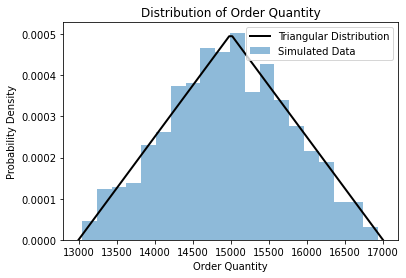

In [151]:
import numpy as np
from scipy.stats import triang, t
import matplotlib.pyplot as plt

# Define the triangular probability distribution
a = 13000
c = 15000
b = 17000
dist = triang(c=(c-a)/(b-a), loc=a, scale=b-a)

# Generate a random sample of order quantities
sample_size = 1000
order_quantities = dist.rvs(size=sample_size)

# Calculate the sample mean and standard deviation
sample_mean = np.mean(order_quantities)
sample_std = np.std(order_quantities, ddof=1)

# Calculate the standard error
n = len(order_quantities)
std_error = sample_std / np.sqrt(n)

# Determine the degrees of freedom
df = n - 1

# Calculate the critical value for a 95% confidence level
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df)

# Calculate the confidence interval
conf_interval = (sample_mean - t_critical * std_error, sample_mean + t_critical * std_error)

print("95% Confidence Interval for Expected Order Quantity:", conf_interval)

# Plot the histogram of the sample order quantities and compare it to the probability distribution
plt.hist(order_quantities, bins=20, density=True, alpha=0.5)

x = np.linspace(a, b, 100)
plt.plot(x, dist.pdf(x), 'k', linewidth=2)

plt.xlabel('Order Quantity')
plt.ylabel('Probability Density')
plt.title('Distribution of Order Quantity')
plt.legend(['Triangular Distribution', 'Simulated Data'])
plt.show()


In [174]:
#H0: the Order Quantity is the Normal distribution
#H1: the Order Quantity is NOT the Normal distribution


from scipy.stats import kstest

# Define the triangular probability distribution
a = 13000
c = 15000
b = 17000
dist = triang(c=(c-a)/(b-a), loc=a, scale=b-a)

# Generate a random sample of order quantities
sample_size = 1000
order_quantities = dist.rvs(size=sample_size)

# Perform the Kolmogorov-Smirnov test
test_statistic, p_value = kstest(order_quantities, dist.cdf)

print("p-value:", p_value)

# Print the test result
if p_value > 0.05:
    print("The observed distribution does not significantly differ from the triangular distribution.")
else:
    print("The observed distribution significantly differs from the triangular distribution.")
    


p-value: 0.7543622410225298
The observed distribution does not significantly differ from the triangular distribution.


In [169]:
import numpy as np
from scipy.stats import triang, lognorm

# Generate a random sample of order quantities
sample_size = 1000
a = 13000
c = 15000
b = 17000
dist = triang(c=(c-a)/(b-a), loc=a, scale=b-a)
order_quantities = dist.rvs(size=sample_size)

# Fit the order quantities to a triangular distribution
triang_params = triang.fit(order_quantities)
triang_dist = triang(*triang_params)

# Fit the order quantities to a lognormal distribution
lognorm_params = lognorm.fit(order_quantities)
lognorm_dist = lognorm(*lognorm_params)

# Compute the log-likelihood for the two distributions
triang_loglikelihood = np.sum(triang_dist.logpdf(order_quantities))
lognorm_loglikelihood = np.sum(lognorm_dist.logpdf(order_quantities))

# Determine the degrees of freedom for the two distributions
triang_df = len(triang_params) - 1
lognorm_df = len(lognorm_params) - 1

# Calculate the AIC and BIC for the two distributions
k = 2  # number of parameters in each distribution
triang_aic = -2 * triang_loglikelihood + 2 * k
triang_bic = -2 * triang_loglikelihood + k * np.log(sample_size)
lognorm_aic = -2 * lognorm_loglikelihood + 2 * k
lognorm_bic = -2 * lognorm_loglikelihood + k * np.log(sample_size)

print("AIC for Triangular Distribution:", triang_aic)
print("BIC for Triangular Distribution:", triang_bic)
print("AIC for Lognormal Distribution:", lognorm_aic)
print("BIC for Lognormal Distribution:", lognorm_bic)


AIC for Triangular Distribution: 16242.508136002372
BIC for Triangular Distribution: 16252.323646560337
AIC for Lognormal Distribution: 21886.24397840671
BIC for Lognormal Distribution: 21896.059488964675


### (iii) 
Estimate the expected annual number of orders by constructing a 95% confidence interval for it and determine the probability distribution that best fits its distribution. Verify the validity of your choice.

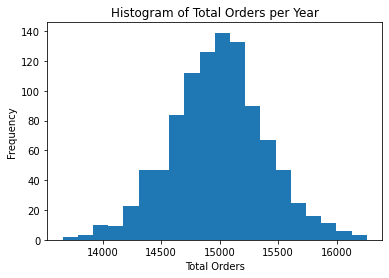

In [180]:
from scipy.stats import poisson

import numpy as np
import matplotlib.pyplot as plt

# Compute the expected number of orders per month
num_orders_per_month = 15000 / 12

# Generate a random sample of order quantities per month
sample_size = 1000
orders_per_month = np.random.poisson(num_orders_per_month, size=sample_size)

# Calculate the total number of orders per year
total_orders = orders_per_month * 12

# Construct a histogram
plt.hist(total_orders, bins=20)
plt.title('Histogram of Total Orders per Year')
plt.xlabel('Total Orders')
plt.ylabel('Frequency')
plt.show()


In [181]:
from scipy import stats

# Calculate the mean and standard deviation of the total number of orders
mean = np.mean(total_orders)
std = np.std(total_orders, ddof=1)

# Calculate the 95% confidence interval
conf_int = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(len(total_orders)))

print(f"Expected annual number of orders: {mean:.2f}")
print(f"95% Confidence interval: ({conf_int[0]:.2f}, {conf_int[1]:.2f})")


Expected annual number of orders: 14986.69
95% Confidence interval: (14961.53, 15011.85)


In [194]:
from scipy.stats import chisquare

# Set the number of bins for the histogram
num_bins = 20

# Calculate the observed frequencies for each bin
observed, bins = np.histogram(total_orders, bins=num_bins)

# Calculate the expected frequencies for each bin assuming a Poisson distribution
expected = sample_size * np.diff(poisson.cdf(bins, num_orders_per_month * 12))

# Perform the chi-square test
test_statistic, p_value = chisquare(observed, expected)

# Print the test result
if p_value > 0.05:
    print("The observed distribution does not significantly differ from the Poisson distribution.")
else:
    print("The observed distribution significantly differs from the Poisson distribution.")


The observed distribution significantly differs from the Poisson distribution.
